# 제3강 데이터 다루기

# 데이터 준비


In [131]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [132]:
 
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [133]:
#데이터 합치기 
length=bream_length+smelt_length
weight=bream_weight+smelt_length



In [134]:
#zip으로 데이터 묶기
zip_data=zip(length,weight)

In [135]:
# 싸이킷 런에 사용할 데이터
fish_data=[]
for l,w in zip_data:
    #print("length",l)
    #print("weight",w)
    fish_data.append([l,w])

In [136]:
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [137]:
fish_data[40:]

[[11.3, 11.3],
 [11.8, 11.8],
 [11.8, 11.8],
 [12.0, 12.0],
 [12.2, 12.2],
 [12.4, 12.4],
 [13.0, 13.0],
 [14.3, 14.3],
 [15.0, 15.0]]

In [138]:
#Target 데이터 생성
fish_target=[1]*35+[0]*14

In [139]:
fish_target[:5]

[1, 1, 1, 1, 1]

In [140]:
fish_target[40:]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [141]:
fish_target[30:40] ## slicing 해준다.[숫자(인덱스):숫자]

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

# 데이터 분할

In [142]:
# 학습 데이터=>모델을 만들때 사용하는 데이터 
train_input= fish_data[:35]
train_target=fish_target[:35]



In [143]:
print(len(train_input))

35


In [144]:
#검증 데이터 => 학습에 사용하지 않은 데이터 
test_input=fish_data[35:]
test_taget=fish_target[35:]

In [145]:
print(len(test_input))

14


## 모델링

In [146]:
# 모델링 패키지 가져오기 
from sklearn.neighbors import KNeighborsClassifier

In [147]:
# 모델링 클래스 초기화
knn=KNeighborsClassifier(n_neighbors=7)

In [148]:
# 학습 데이터를 사용하여 모델을 생성
knn.fit(train_input, train_target)

KNeighborsClassifier(n_neighbors=7)

In [149]:
knn.score(test_input,test_taget)

0.0

# Numpy 사용 랜덤 분할 

In [150]:

import numpy as np

In [151]:
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

In [152]:
np.random.seed(42)

In [153]:
index=np.arange(49)

In [154]:
np.random.shuffle(index)

In [155]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [156]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

In [157]:
index[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [158]:
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

# Random sampling 확인

In [159]:
import matplotlib.pyplot as plt

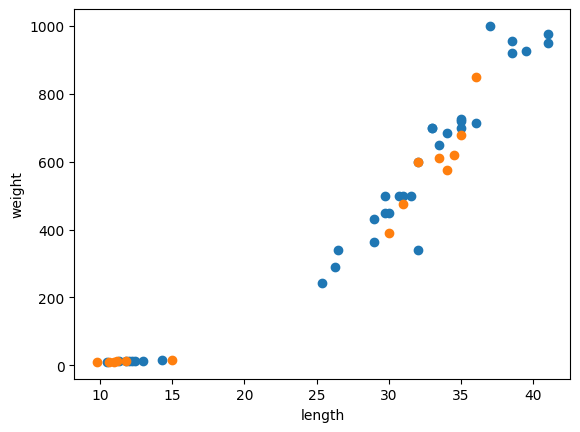

In [160]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [161]:
# 모델링 패키지 가져오기 
from sklearn.neighbors import KNeighborsClassifier



In [162]:
# 모델링 클래스 초기화
knn=KNeighborsClassifier(n_neighbors=5)

In [163]:
knn.fit(train_input,train_target)

KNeighborsClassifier()

In [164]:
knn.score(test_input,test_taget)

0.42857142857142855

In [165]:
a_fish=[25,100]

In [166]:
knn.predict([a_fish])

array([0])

## Numpy의 column_stack(), concatenate 함수

In [167]:
import numpy as np 

In [168]:
a=np.array([1,2,3,4])
b=np.array([4,5,6,7])

In [169]:
rs= np.column_stack((a,b))

In [170]:
rs

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])

In [171]:
np.concatenate((a,b))

array([1, 2, 3, 4, 4, 5, 6, 7])

In [172]:
# 대구 길이 
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
# 대구 무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]




In [173]:
 
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [175]:
#데이터 합치기 
length=bream_length+smelt_length
weight=bream_weight+smelt_length

In [178]:
fish_data=np.column_stack((length,weight))

In [179]:
fish_data.shape

(49, 2)

In [177]:
fish_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [180]:
np.ones(35)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [181]:
np.zeros(14)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))

In [183]:
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Sklearn train_test_split() 함수 사용 데이터 분할 

In [184]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target=train_test_split(fish_data,fish_target,random_state=42)

In [190]:
print(train_input.shape,test_input.shape)

(35, 2) (14, 2)


In [192]:
print(train_target.shape,test_target.shape)

(35,) (14,)


## Unique()함수를 사용하여 클래스 비율 검토 

In [193]:
a_data=np.array([1,1,"a","a",2,"C"])

In [194]:
unique_value, unique_frequency= np.unique(a_data, return_counts=True)

In [195]:
unique_value

array(['1', '2', 'C', 'a'], dtype='<U21')

In [196]:
unique_frequency

array([2, 1, 1, 2])

In [197]:
np.column_stack((unique_value,unique_frequency))

array([['1', '2'],
       ['2', '1'],
       ['C', '1'],
       ['a', '2']], dtype='<U21')

In [198]:
train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [199]:
unique_value, unique_frequency= np.unique(train_target, return_counts=True)

In [201]:
np.column_stack((unique_value,unique_frequency))

array([[ 0,  8],
       [ 1, 27]])

In [202]:
print(11/(11+25))

0.3055555555555556


In [203]:
print(unique_frequency[0]/(unique_frequency[0]+unique_frequency[1]))

0.22857142857142856


In [204]:
test_taget

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
unique_value,unique_frequency=np.

In [206]:
train_input, test_input, train_target, test_taget=train_test_split(fish_data,
                                                       fish_target,
                                                       stratify=fish_target,
                                                       random_state=42)

In [207]:
print(test_taget)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
